# Time series analysis - Example code 20: State space model of an ARMA process

**Lund University, Lund, Sweden**

**Reference:**  
"An Introduction to Time Series Modeling", 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

## Simulate an ARMA process

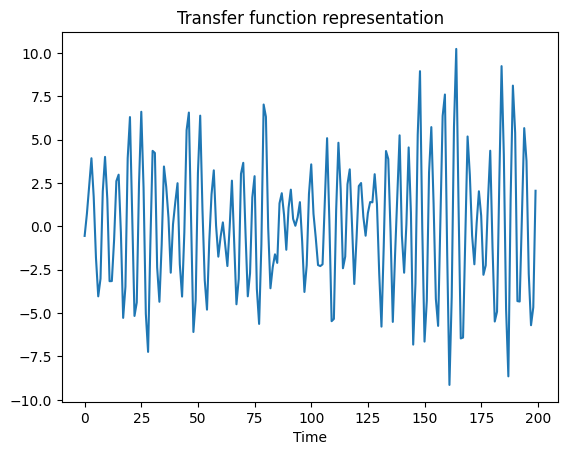

In [2]:
# Simulate an ARMA process. Leave the initial values to see how the
# different representation affect these samples.
N = 200
C0 = np.array([1, 0.6, 0.5, -0.8])
A0 = np.array([1, -0.6, 0.8])
e = np.random.randn(N)
y = lfilter(C0, A0, e)                         # This is the transfer function representation.

plt.figure()
plt.plot(y)
plt.title('Transfer function representation')
plt.xlabel('Time')
plt.show()

## Form the state space representations of the ARMA

In [3]:
# Note how these representations are equivalent (except in the initial "ring-down").
p = len(A0) - 1
q = len(C0) - 1
d = max(p, q + 1)
print(f'Number of states required is max(p, q+1) = {d}.')

Number of states required is max(p, q+1) = 4.


## Controllable canonical form

In [4]:
A = np.array([[-A0[1], -A0[2], 0, 0],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])
B = np.array([[1], [0], [0], [0]])
C = C0.reshape(1, -1)
xt = np.zeros((4, 1))
yc = np.zeros(N)

for t in range(N):
    xt = A @ xt + B * e[t]
    yc[t] = (C @ xt)[0, 0]

print('The A matrix for a controllable canonical form is:')
print(A)

The A matrix for a controllable canonical form is:
[[ 0.6 -0.8  0.   0. ]
 [ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   0. ]]


## Observable canonical form

In [5]:
A = np.array([[-A0[1], 1, 0, 0],
              [-A0[2], 0, 1, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 0]])
B = C0.reshape(-1, 1)
C = np.array([[1, 0, 0, 0]])
xt = np.zeros((4, 1))
yo = np.zeros(N)

for t in range(N):
    xt = A @ xt + B * e[t]
    yo[t] = (C @ xt)[0, 0]

print('The A matrix for an observable canonical form is:')
print(A)

The A matrix for an observable canonical form is:
[[ 0.6  1.   0.   0. ]
 [-0.8  0.   1.   0. ]
 [ 0.   0.   0.   1. ]
 [ 0.   0.   0.   0. ]]


## Random transformation of the state space form

In [6]:
T = np.random.randn(d, d)                      # Create a random transformation matrix.
iT = np.linalg.inv(T)
A = T @ A @ iT                                 # Transform the state matrices.
B = T @ B
C = C @ iT
yr = np.zeros(N)

for t in range(N):
    xt = A @ xt + B * e[t]
    yr[t] = (C @ xt)[0, 0]

print('The A matrix using a random transformation is:')
print(A)

The A matrix using a random transformation is:
[[ 0.40862555  0.32293765  0.47305272  0.0683728 ]
 [-1.00965174  0.45788776  0.22159893 -0.63685435]
 [-0.89129224  0.07671752  0.8837732  -0.29231584]
 [-0.39941724  1.81134441 -0.17491017 -1.15028651]]


## Compare realisations

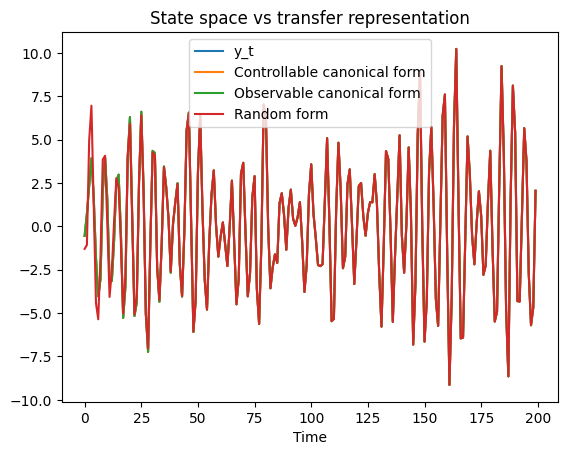

In [7]:
# Note the initial difference for the random version.
plt.figure()
plt.plot(y, label='y_t')
plt.plot(yc, label='Controllable canonical form')
plt.plot(yo, label='Observable canonical form')
plt.plot(yr, label='Random form')
plt.title('State space vs transfer representation')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()